In [1]:
!pip install ipympl
%matplotlib widget
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Normal distribution

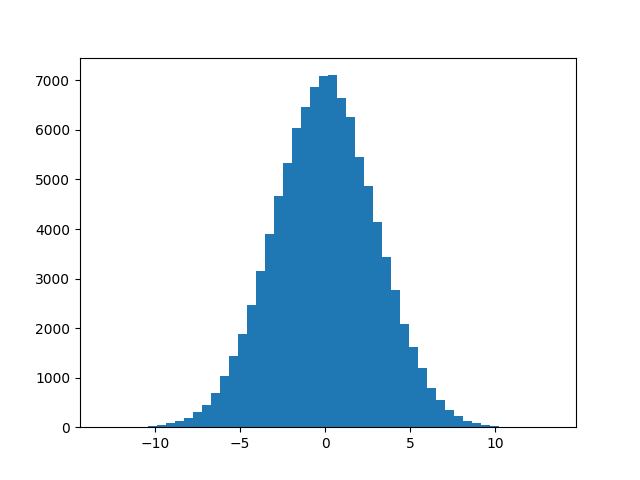

In [2]:
xs=np.random.normal(0,3,100000)
rst=plt.hist(xs,bins=50)

## Create noisy data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# example data with noise
xs = np.linspace(0, 10, 10)
a=2.5
b=5
y_true = a * xs + b
## artificial noise added.
noise = np.random.normal(0, 50, size=xs.shape) ## 정규분포 mean:0, std: 3
ys = y_true + noise
plt.plot(xs,y_true)
plt.plot(xs,ys,'o')

In [4]:
plt.plot(xs,ys,'ro',label='Data with noise')
#plt.plot(xs,y_true,'k-',label='True data')

tilde_a=2
tilde_b=5

epsilon=np.zeros(xs.shape)
for i, x in enumerate(xs):
    y=x*tilde_a+tilde_b
    epsilon[i]=y-ys[i]
    plt.plot([x,x],[ys[i],y],'-')
plt.plot(xs,tilde_a*xs+tilde_b,'m--',label='manual fit')
print(f'residual: {(epsilon**2).sum()}')
plt.legend()

## least square
matrix=np.zeros((2,2))
matrix[0,0]=(xs**2).sum()
matrix[0,1]=xs.sum()
matrix[1,0]=xs.sum()
matrix[1,1]=len(xs)
#print(matrix)
c=np.zeros(2)
c[0]=(xs*ys).sum()
c[1]=ys.sum()
a_lsq,b_lsq=np.linalg.inv(matrix)@c ## m^{-1} . c
ys_opti=xs*a_lsq+b_lsq
plt.plot(xs,ys_opti,label='Least square')
print('a and a_lsq:',a,a_lsq)
print('b and b_lsq:',b,b_lsq)
plt.plot(xs,y_true,label='actual data without noise')
plt.legend()
#plt.plot([x*1.1,x*1.1],[-abs(epsilon).sum()*0.5,abs(epsilon).sum()*0.5],'--b',label='total residual')

residual: 18285.158812282403
a and a_lsq: 2.5 0.5039889030570096
b and b_lsq: 5 -2.329249525431261


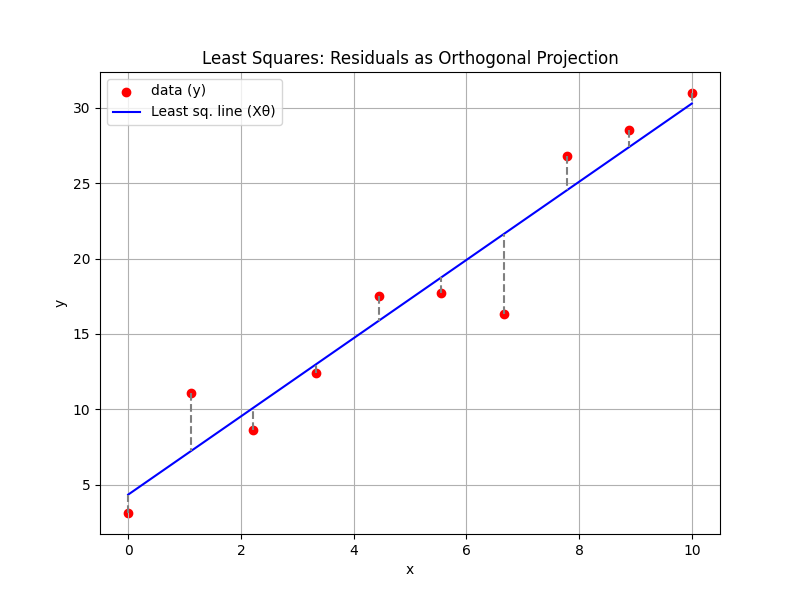

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 (y는 X와 독립적으로 선택)
x = np.linspace(0, 10, 10)
y = 2.5 * x + 5 + np.random.normal(0, 3, size=x.shape)

# 디자인 행렬
X = np.vstack([x, np.ones(len(x))]).T

# 최소자승 해
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
y_fit = X @ theta

# 잔차 벡터 (residual)
residual = y - y_fit

plt.figure(figsize=(8,6))
plt.scatter(x, y, label="data (y)", color="red")
plt.plot(x, y_fit, label="Least sq. line (Xθ)", color="blue")

# 잔차 시각화 (y점에서 직선까지 수직선)
for xi, yi, yfi in zip(x, y, y_fit):
    plt.plot([xi, xi], [yi, yfi], color="gray", linestyle="--")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Least Squares: Residuals as Orthogonal Projection")
plt.grid(True)
plt.show()

추정된 평면: z = 2.02x + 3.10y + 4.12


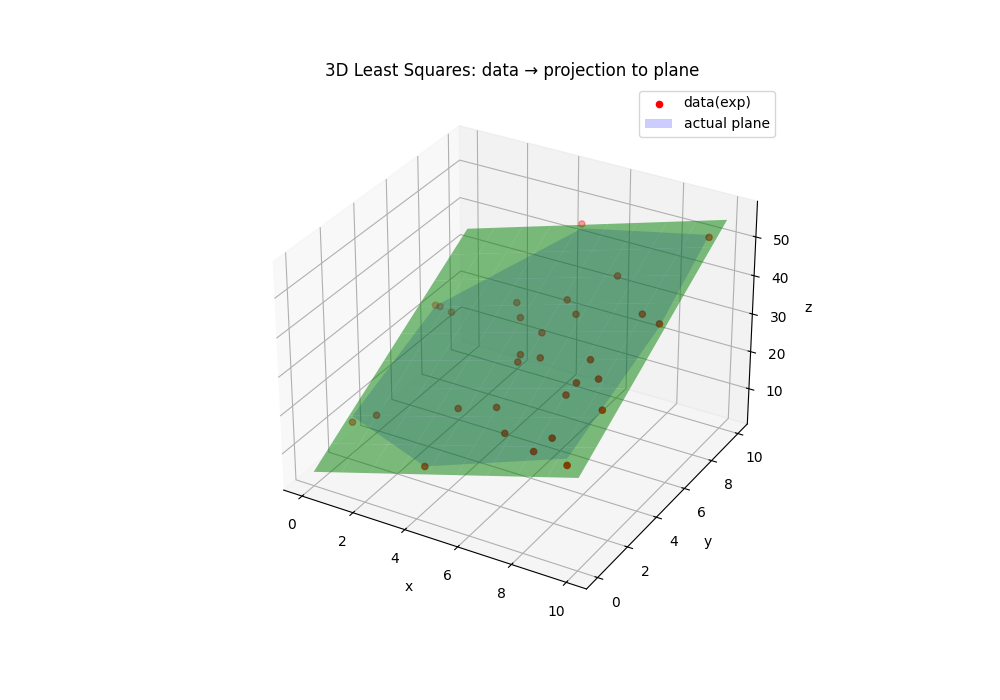

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# (1) 데이터 생성 (z = 2x + 3y + 5 + noise)
dx=10
dy=10
np.random.seed(0)
x = np.random.rand(30) * dx
y = np.random.rand(30) * dy
z_true = 2*x + 3*y + 5
z = z_true + np.random.normal(0, 1, size=x.shape)  # 노이즈 포함

# (2) 디자인 행렬: [x, y, 1]
X = np.vstack([x, y, np.ones(len(x))]).T

# (3) 최소자승 해
theta = np.linalg.inv(X.T @ X) @ (X.T @ z)
a, b, c = theta
print(f"추정된 평면: z = {a:.2f}x + {b:.2f}y + {c:.2f}")

# (4) 피팅 평면 계산
xx, yy = np.meshgrid(np.linspace(0,dx,10), np.linspace(0,dy,10))
zz = a*xx + b*yy + c

# (5) 시각화
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

# 데이터 점
ax.scatter(x, y, z, color="red", label="data(exp)")
# 실제 평면 (노이즈 없는 데이터)
ax.plot_trisurf(x, y, z_true, alpha=0.2, color="blue", label="actual plane")
# 최소자승 평면
ax.plot_surface(xx, yy, zz, alpha=0.5, color="green")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D Least Squares: data → projection to plane")
plt.legend()
plt.show()

$$
\begin{bmatrix}
\sum_i^nx_i^2 & \sum_i^nx_i\\
\sum_i^nx_i & n
\end{bmatrix}
\begin{bmatrix}
\tilde a\\
\tilde b
\end{bmatrix}
=
\begin{bmatrix}
\sum_i^nx_iy_i\\
\sum_i^ny_i
\end{bmatrix}
$$